## Mentorskool Covid-19 Project : Querying Google Cloud SQL Server Starter


### Connecting to a CloudSQL or Local database Using SQLAlchemy Engine

**Methods :**
1. Connect to CloudSQL instance using CloudSQL proxy and SQL Alchemy:
   * For GCP accounts with permission - Cloud SQL -> Client, Admin etc. 
   * Lets the User update, modify the tables acc. to the permission given.
   * cloud_sql_proxy needs to be running and set-up on your local machine and your credentials need to accessible as environment variable or JSON key
   * Receive CloudSQL Instance Public IP and your username, password.
   * Connect using the command : <br>
   ./cloud_sql_proxy -instances=***REMOVED***:***REMOVED***:covid19-india=tcp:5432
   * Use SQL Alchemy to connect.
   
Refer : https://cloud.google.com/sql/docs/postgres/connect-external-app

2. Get Access via public IP Access:
   * Find your public IP using https://www.whatismyip.com/
   * You might need to get a '/32' added at the end of the IP. Some ISPs also refresh the IP provided to a user, get it added again if that happens.
   * Get the public IP added to list of allowed IPs by someone with apt. CloudSQL Role.
   * Add IP: CloudSQL-> covid19-data-server->Connections->Public IP -> Add network
   * Receive CloudSQL Instance Public IP and your username, password.
   * Use SQL Alchemy to connect.
   
Refer : https://cloud.google.com/sql/docs/postgres/configure-ip#console

In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [5]:
# Credentials
db_user = 'postgres'
db_password = '***REMOVED***'
#cloud_sql_ip = '***REMOVED***'
cloud_sql_ip = 'localhost:5433'
db_name = 'covid19-india'

In [6]:
engine = create_engine(f'postgresql://{db_user}:{db_password}@{cloud_sql_ip}/{db_name}')

### Query the Data and Draw Insights!
<div>
<img src="DB_ERD.png" width="300"/>
</div>

In [11]:
# Query data from the tables Using Pandas according to the ERD.
# Pandas has good compatibility with SQL Alchemy and can directly pass SQL queries to the engine.

states = pd.read_sql('SELECT * FROM states_info', engine , parse_dates = True, index_col ='Date')

testing = pd.read_sql('SELECT * FROM testing_stats', engine , parse_dates = True, index_col ='Date')

overall = pd.read_sql('SELECT * FROM overall_stats', engine, parse_dates = True, index_col ='Date')

In [12]:
# Join Dataframes acc. to keys from schema

main_join = overall.join(testing, on = 'Date', how = 'left')
main_join

,DailyConfirmed,DailyDeceased,DailyRecovered,TotalConfirmed,TotalDeceased,TotalRecovered,TestingSamples
Date,,,,,,,
2020-01-30,1,0,0,1,0,0,NaN
2020-01-31,0,0,0,1,0,0,NaN
2020-02-01,0,0,0,1,0,0,NaN
2020-02-02,1,0,0,2,0,0,NaN
2020-02-03,1,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...
2020-08-20,68507,981,61873,2904343,54987,2157934,32661252.0
2020-08-21,69028,953,62858,2973382,55940,2220792,33467237.0
2020-08-22,70067,918,59101,3043450,56858,2279893,34491073.0


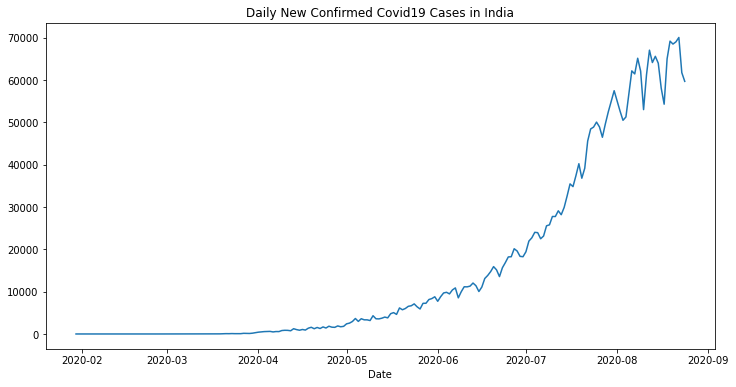

In [14]:
# Create Visualisations, perform analysis etc.
main_join['DailyConfirmed'].plot(figsize = (12,6), title = 'Daily New Confirmed Covid19 Cases in India')

In [19]:
# Time series of cases from a single state 
states.loc[states['State'] == 'Delhi']

,State,Confirmed,Deceased,Recovered
Date,,,,
2020-03-14,Delhi,7,1,1
2020-03-15,Delhi,0,0,1
2020-03-16,Delhi,0,0,0
2020-03-17,Delhi,1,0,0
2020-03-18,Delhi,2,0,0
...,...,...,...,...
2020-08-20,Delhi,1215,22,1059
2020-08-21,Delhi,1250,13,1082
2020-08-22,Delhi,1412,14,1230


##### Resources :
https://www.datacamp.com/community/tutorials/beginners-introduction-postgresql#comments